In [433]:
path = "/home/fedflorio/master_thesis/MatrixProductBP.jl/notebooks/sis_inference_data/sigmoid_karate_add_snaps_step16_nobs400.jld2"
;

In [434]:
using Pkg
Pkg.activate("/home/fedflorio/master_thesis/")

  Activating project at `~/master_thesis`


In [435]:
using MatrixProductBP, MatrixProductBP.Models
using JLD2, SparseArrays, PyPlot
include("/home/fedflorio/master_thesis/Utilities/roc.jl");

In [436]:
D = load(path)

data = D["data"]
λ_true = D["λ"]
params_history = D["params_history"]
;

In [437]:
data.λ
# params_history[10].λ

34-element Vector{Vector{Float64}}:
 [0.0306992592758464, 0.03188687559677016, 0.02974007575018715, 0.030217458757810695, 0.029725196529250052, 0.030838378437437395, 0.03005193454736806, 0.028737274046274963, 0.032377025779815355, 0.031469137127893204, 0.026548709638371668, 0.02943658881481952, 0.03122406871185284, 0.03182841831817658, 0.032782796279671275, 0.03039650483439227, 0.03153822342153692, 0.030857132336059294, 0.030526847516747745]
 [0.02119128454093637, 0.022258252188822315, 0.030435291237476028, 0.025316018569229864, 0.027625051275051465, 0.026046246010823153, 0.01927202736182309, 0.02855654781898334, 0.026040465377316295, 0.026982590354062308, 0.03012202119067496, 0.03189557529169238, 0.028729435610461686]
 [0.032619092800041896, 0.02685315416976372, 0.028533842508236977, 0.02991959201766494, 0.03421800672593216, 0.02795343379625345, 0.032168499944918987, 0.03344418965614902, 0.02915649280975721, 0.027426970959959746, 0.027328810525436734, 0.027368368691989386, 0.029753352

In [438]:
timept = 1
timept = length(params_history)

_data = [params_history[timept].λ[i][j] for i in eachindex(params_history[timept].λ) for j in eachindex(params_history[timept].λ[i])]
_history = [params_history[timept-1].λ[i][j] for i in eachindex(params_history[timept-1].λ) for j in eachindex(params_history[timept-1].λ[i])]

Δ = maximum((_data .- _history)./_data)
println("Δ($(timept)) = $(Δ)")

Δ(20) = 0.9999998523717769


auc = 0.7917899408284024


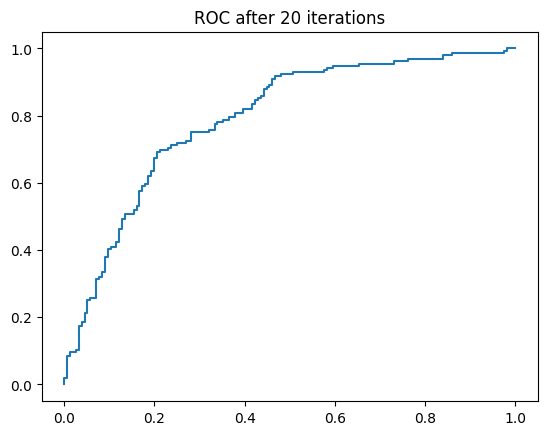

In [439]:
neigs = load("/home/fedflorio/master_thesis/MatrixProductBP.jl/notebooks/sis_inference_data/karate_add_neigs.jld2")["neigs"]

λ = params_history[timept].λ
λ = data.λ
xplot, yplot, area = roccurve_incomplete(deepcopy(λ), λ_true, neigs)
close("all")
plot(xplot,yplot)
title("ROC after $(length(params_history)) iterations")
println("auc = $area")

In [440]:
auc_iterations = []
for p in params_history
    area = roccurve_incomplete(deepcopy(p.λ), λ_true, neigs)[3]
    push!(auc_iterations, area)
    println(area)
end

m = argmax(auc_iterations)
println("\nMax AUC for $(m) iterations\nAUC = $(auc_iterations[m])")

0.4986439842209073
0.7013067061143984
0.7474934253780408
0.7305637738330046
0.7313034188034188
0.744904667981591
0.7383300460223537
0.7701758711374096
0.7761752136752137
0.7767094017094017
0.7755999342537804
0.7738330046022354
0.7757232084155161
0.7750657462195923
0.782215647600263
0.7831607495069034
0.7875986193293886
0.787146614069691
0.7910502958579881
0.7917899408284024

Max AUC for 20 iterations
AUC = 0.7917899408284024
